In [39]:
import pandas as pd

In [40]:
housing=pd.read_csv('housing.csv')

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(array([  62.,   62.,  191.,  244.,  160.,  175.,  206.,  205.,  264.,
         254.,  238.,  302.,  412.,  512.,  771.,  698.,  570.,  502.,
         465.,  446.,  399.,  448.,  478.,  566.,  619.,  488.,  471.,
         461.,  476.,  458.,  565.,  615.,  689.,  824.,  862.,  537.,
         394.,  369.,  304.,  296.,  368.,  353.,  356.,  294.,  245.,
         198.,  177.,  134.,  136., 1321.]),
 array([ 1.  ,  2.02,  3.04,  4.06,  5.08,  6.1 ,  7.12,  8.14,  9.16,
        10.18, 11.2 , 12.22, 13.24, 14.26, 15.28, 16.3 , 17.32, 18.34,
        19.36, 20.38, 21.4 , 22.42, 23.44, 24.46, 25.48, 26.5 , 27.52,
        28.54, 29.56, 30.58, 31.6 , 32.62, 33.64, 34.66, 35.68, 36.7 ,
        37.72, 38.74, 39.76, 40.78, 41.8 , 42.82, 43.84, 44.86, 45.88,
        46.9 , 47.92, 48.94, 49.96, 50.98, 52.  ]),
 <BarContainer object of 50 artists>)

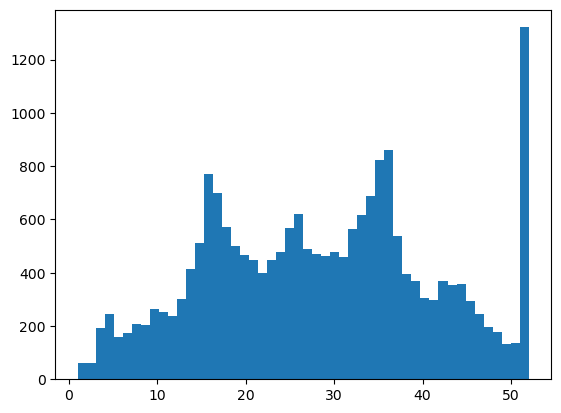

In [42]:
import matplotlib.pyplot as plt
plt.hist(housing['housing_median_age'],bins=50)

In [43]:
import numpy as np

In [44]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

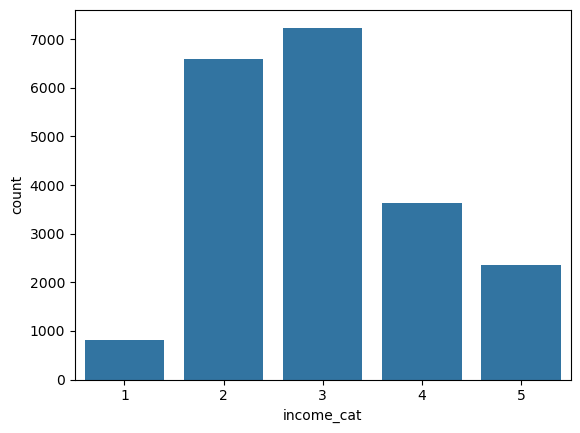

In [45]:
import seaborn as sns
sns.countplot(x="income_cat",data=housing)
plt.show()

In [46]:
housing_num=housing.select_dtypes(include=[np.number])

In [47]:
from sklearn.pipeline import make_pipeline

In [48]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

In [49]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())

In [50]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [51]:
housing_num_prepared[:2].round(2)

array([[-1.33,  1.05,  0.98, -0.8 , -0.97, -0.97, -0.98,  2.34,  2.13],
       [-1.32,  1.04, -0.61,  2.05,  1.36,  0.86,  1.67,  2.33,  1.31]])

In [52]:
df_housing_num_prepared = pd.DataFrame(
housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
index=housing_num.index)

In [53]:
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


In [54]:
from sklearn.compose import ColumnTransformer
cat_attribs=["ocean_proximity"]
num_attribs=["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]

In [55]:
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))
transformer=ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs)])


In [56]:
housing_transformed=transformer.fit_transform(housing)

In [58]:
housing_final=pd.DataFrame(housing_transformed,columns=transformer.get_feature_names_out(),index=housing.index)

In [59]:
housing_final.head()

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0
